In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing dataset
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 0, 'Survivors')

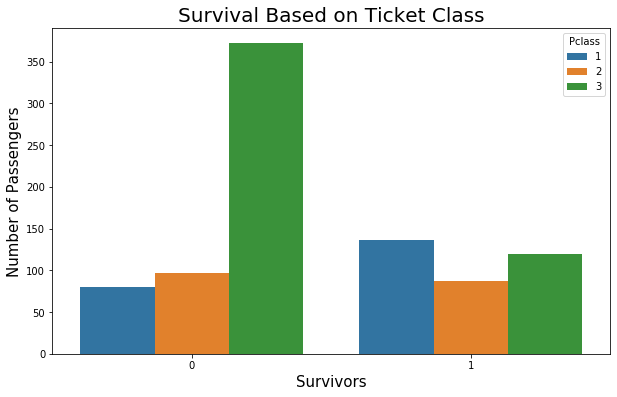

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(df['Survived'], hue=df['Pclass'])
plt.title("Survival Based on Ticket Class", fontsize=20)
plt.ylabel("Number of Passengers", fontsize=15)
plt.xlabel("Survivors", fontsize=15)

We can observe that many passengers from the 3rd class ticket category have died! Also the most survivors are from the !st class ticket category

Text(0.5, 0, 'Gender')

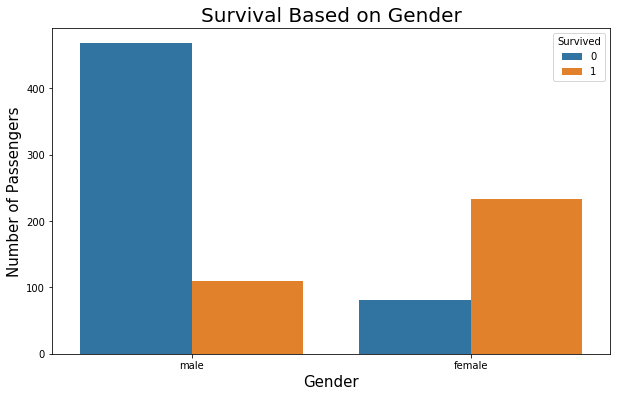

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(df['Sex'], hue=df['Survived'])
plt.title("Survival Based on Gender", fontsize=20)
plt.ylabel("Number of Passengers", fontsize=15)
plt.xlabel("Gender", fontsize=15)

By looking at the above graph we can see that the most number of survivors are females! The number of deaths in the male genders are higher.

In [7]:
df['Age'].describe()

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Survival based on Age Groups')

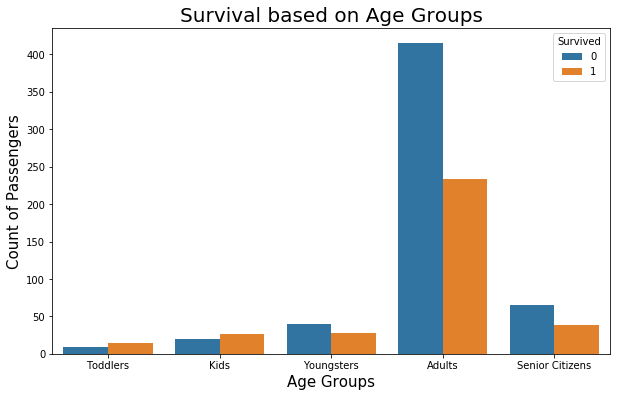

In [8]:
plt.figure(figsize=(10,6))
agegroups = pd.cut(df.Age, bins =[0, 2, 13, 18, 45, 99], labels = ['Toddlers','Kids', 'Youngsters', 'Adults', 'Senior Citizens'])
df.insert(5, 'Age_Group', agegroups)
sns.countplot(df['Age_Group'], hue=df['Survived'])
plt.xlabel('Age Groups', fontsize= 15)
plt.ylabel('Count of Passengers', fontsize= 15)
plt.title("Survival based on Age Groups", fontsize = 20)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_Group,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Adults,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adults,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adults,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adults,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Adults,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 0, 'Number of Siblings')

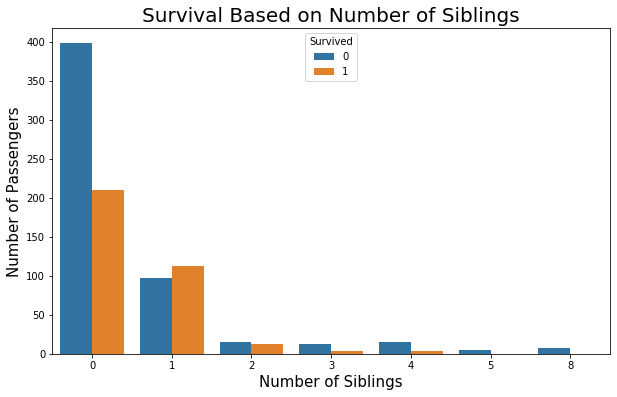

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(df['SibSp'], hue=df['Survived'])
plt.title("Survival Based on Number of Siblings", fontsize=20)
plt.ylabel("Number of Passengers", fontsize=15)
plt.xlabel("Number of Siblings", fontsize=15)

In [11]:
recode_variables = {"Sex":     {"male": 1, "female": 0},
                "Embarked": {"C": 1, "S": 2, "Q": 3}
                }
df = df.replace(recode_variables)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_Group,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,Adults,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,Adults,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,Adults,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,Adults,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,Adults,35.0,0,0,373450,8.0500,NaN,2


In [12]:
df.drop(['Cabin',], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_Group,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,Adults,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,Adults,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,Adults,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,Adults,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,Adults,35.0,0,0,373450,8.0500,2


In [13]:
df.drop(['Fare'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_Group,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,Adults,22.0,1,0,A/5 21171,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,Adults,38.0,1,0,PC 17599,1
2,3,1,3,"Heikkinen, Miss. Laina",0,Adults,26.0,0,0,STON/O2. 3101282,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,Adults,35.0,1,0,113803,2
4,5,0,3,"Allen, Mr. William Henry",1,Adults,35.0,0,0,373450,2


In [14]:
df.Age_Group.value_counts()

Adults             649
Senior Citizens    103
Youngsters          68
Kids                47
Toddlers            24
Name: Age_Group, dtype: int64

In [15]:
recode_age = {"Age_Group":     {"Toddlers": 0, "Kids": 1, "Youngsters":2, "Adults":3, "Senior Citizens":4}
                }
df = df.replace(recode_age)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_Group,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,3,22.0,1,0,A/5 21171,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,38.0,1,0,PC 17599,1
2,3,1,3,"Heikkinen, Miss. Laina",0,3,26.0,0,0,STON/O2. 3101282,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,35.0,1,0,113803,2
4,5,0,3,"Allen, Mr. William Henry",1,3,35.0,0,0,373450,2


Text(0.5, 1, 'Pearson Correlation Diagram')

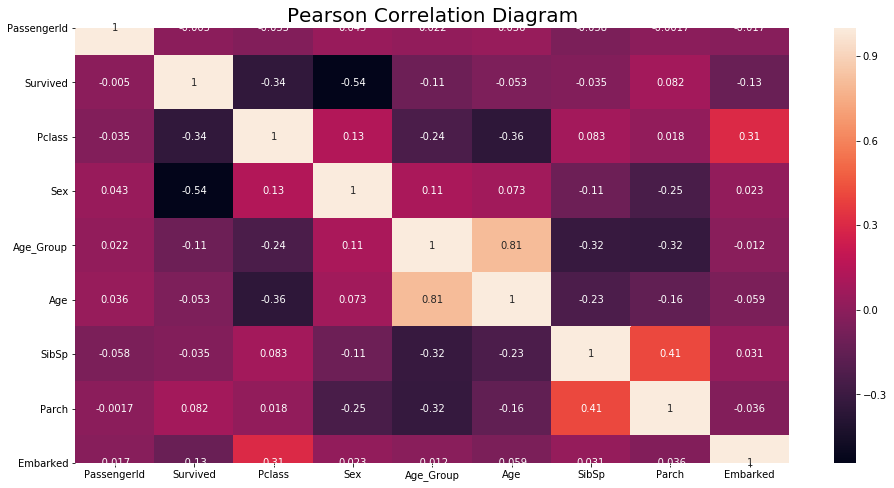

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Pearson Correlation Diagram", fontsize=20)

In [17]:
testdf = pd.read_csv("test.csv")
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
testdf.drop(['Ticket','Cabin','Fare','Name'], axis=1, inplace=True)
testdf.shape

(418, 7)

In [19]:
df.drop(['Age','Ticket','Name'], axis=1, inplace=True)
df.shape

(891, 8)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age_Group,SibSp,Parch,Embarked
0,1,0,3,1,3,1,0,2
1,2,1,1,0,3,1,0,1
2,3,1,3,0,3,0,0,2
3,4,1,1,0,3,1,0,2
4,5,0,3,1,3,0,0,2


In [21]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = testdf.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 6))

In [22]:
X_test['Age']=X_test['Age'].fillna(X_test['Age'].mode()[0])
X_test.insert(5, 'Age_Group', agegroups)
#X_test = X_test.replace(recode_age)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Age_Group,Embarked
0,3,male,34.5,0,0,Adults,Q
1,3,female,47.0,1,0,Adults,S
2,2,male,62.0,0,0,Adults,Q
3,3,male,27.0,0,0,Adults,S
4,3,female,22.0,1,1,Adults,S


In [23]:
X_test = X_test.replace(recode_age)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Age_Group,Embarked
0,3,male,34.5,0,0,3,Q
1,3,female,47.0,1,0,3,S
2,2,male,62.0,0,0,3,Q
3,3,male,27.0,0,0,3,S
4,3,female,22.0,1,1,3,S


In [24]:
X_test.drop(['Age'], axis=1, inplace=True)

In [25]:
X_test = X_test.replace(recode_variables)
X_test.head()

,Pclass,Sex,SibSp,Parch,Age_Group,Embarked
0,3,1,0,0,3,3
1,3,0,1,0,3,2
2,2,1,0,0,3,3
3,3,1,0,0,3,2
4,3,0,1,1,3,2


In [26]:
X_train.drop(['PassengerId'], axis=1, inplace=True)
X_train.head()

,Pclass,Sex,Age_Group,SibSp,Parch,Embarked
0,3,1,3,1,0,2
1,1,0,3,1,0,1
2,3,0,3,0,0,2
3,1,0,3,1,0,2
4,3,1,3,0,0,2


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [29]:
submission = pd.DataFrame({
        "PassengerId": testdf["PassengerId"],
        "Survived": Y_pred
    })

In [30]:
submission.to_csv("submission.csv")

In [31]:
submission

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [32]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_pred)
models

C:\Users\Nidhi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:01<00:00, 16.15it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.39,0.53,0.53,0.46,0.01
DummyClassifier,0.42,0.49,0.49,0.49,0.01
LogisticRegression,0.38,0.44,0.44,0.46,0.01
QuadraticDiscriminantAnalysis,0.44,0.44,0.44,0.51,0.02
AdaBoostClassifier,0.41,0.44,0.44,0.48,0.10
SGDClassifier,0.38,0.42,0.42,0.45,0.00
BaggingClassifier,0.36,0.42,0.42,0.43,0.02
RandomForestClassifier,0.35,0.42,0.42,0.43,0.13
LinearSVC,0.36,0.42,0.42,0.44,0.03


In [33]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier()

In [34]:
y_pred2=clf.predict(X_test)

In [35]:
y_pred2


array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [36]:
submission2 = pd.DataFrame({
        "PassengerId": testdf["PassengerId"],
        "Survived": y_pred2
    })

In [37]:
submission2.to_csv("submission.csv")